In [1]:
%cd /Users/gwg/dmcm
%matplotlib inline

/Users/gwg/dmcm


In [2]:
from   PIL import Image
import itertools
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import torch

from   data import MnistConfig, MnistDataset, loader
from   models import DPCCA

In [3]:
cfg = MnistConfig()

In [4]:
path = 'experiments/test/model.pt'    
state = torch.load(path, map_location={'cuda:0': 'cpu'})
model = DPCCA(cfg, latent_dim=2, use_gene_net=True)
model.load_state_dict(state)

In [5]:
train_loader, test_loader = loader.get_data_loaders(cfg,
                                                    batch_size=128,
                                                    num_workers=1,
                                                    pin_memory=False,
                                                    cv_pct=0.1)
dataset = train_loader.dataset

In [78]:
inds = test_loader.sampler.indices
n    = len(inds)

X1 = torch.Tensor(n, cfg.N_CHANNELS, cfg.IMG_SIZE, cfg.IMG_SIZE)
X2 = torch.Tensor(n, cfg.N_GENES)
labels = torch.Tensor(n)

j = 0
for idx in inds:
    lab = dataset.labels[idx]
    x1, x2 = dataset[idx]
    X1[j] = x1
    X2[j] = x2
    labels[j] = lab
    j += 1

inds = np.arange(0, n)
np.random.shuffle(inds)
inds = inds[:1000]

X1     = X1[inds]
X2     = X2[inds]
labels = labels[inds]

X1r, X2r = model.forward([X1, X2])

X1  = X1.detach()
X2  = X2.detach()
X1r = X1r.detach()
X2r = X2r.detach()

print(X1.shape)
print(X2.shape)
print(labels.shape)
print(X1r.shape)
print(X2r.shape)

torch.Size([1000, 1, 28, 28])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 1, 28, 28])
torch.Size([1000, 100])


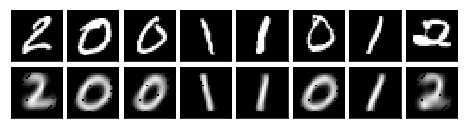

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(8,2))
# fig.tight_layout()
# import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(2, 8)
# gs.update(wspace=0.025, hspace=0.05)

# ax1 = plt.subplot(gs1[i])

for i, ax in zip(range(9), axes[0]):
    img = X1[i].squeeze(0).detach().numpy()
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
        
for i, ax in zip(range(9), axes[1]):
    img = X1r[i].squeeze(0).detach().numpy()
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.subplots_adjust(wspace=0.1, hspace=0.1)

[]

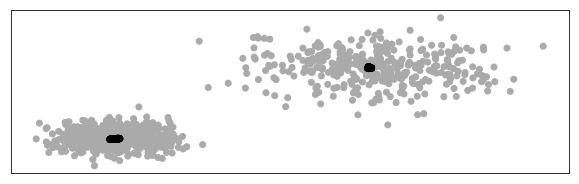

In [82]:
# plt.style.use('seaborn-deep')
# sns.set_palette('hls', 2)
colors = sns.color_palette()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,3))

n = X2.shape[0]
ax.scatter(X2[:, 0], X2[:, 1], c=['#aaaaaa'] * n)
ax.scatter(X2r[:, 0], X2r[:, 1], c=['black'] * n)
ax.set_xticks([])
ax.set_yticks([])